In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = ['a', 'b', 'c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','space','backspace','clear']

data = np.concatenate([
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_a_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_b_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_c_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_d_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_e_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_f_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_g_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_h_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_i_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_j_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_k_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_l_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_m_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_n_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_o_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_p_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_q_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_r_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_s_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_t_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_u_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_v_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_w_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_x_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_y_1689648487.npy"),
    np.load("C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_z_1689648487.npy"),
    np.load('C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_space_1689648487.npy'),
    np.load('C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_backspace_1689648487.npy'),
    np.load('C:/Users/kelly/IdeaProjects/Project mid/dataset/seq_clear_1689648487.npy')
   
], axis=0)

data.shape

(12193, 30, 87)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(12193, 30, 86)
(12193,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(12193, 29)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(10973, 30, 86) (10973, 29)
(1220, 30, 86) (1220, 29)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

model = Sequential([
    LSTM(16, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(512, activation='relu'), 
    Dense(len(actions), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                6592      
                                                                 
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 29)                14877     
                                                                 
Total params: 30,173
Trainable params: 30,173
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
341/343 [============================>.] - ETA: 0s - loss: 2.5473 - acc: 0.3657
Epoch 1: val_acc improved from -inf to 0.54672, saving model to models\model.h5
343/343 [==============================] - 6s 12ms/step - loss: 2.5417 - acc: 0.3663 - val_loss: 1.4704 - val_acc: 0.5467 - lr: 0.0010
Epoch 2/200
339/343 [============================>.] - ETA: 0s - loss: 1.4706 - acc: 0.5496
Epoch 2: val_acc did not improve from 0.54672
343/343 [==============================] - 4s 11ms/step - loss: 1.4729 - acc: 0.5487 - val_loss: 1.5462 - val_acc: 0.5139 - lr: 0.0010
Epoch 3/200
342/343 [============================>.] - ETA: 0s - loss: 1.7336 - acc: 0.5190
Epoch 3: val_acc improved from 0.54672 to 0.57049, saving model to models\model.h5
343/343 [==============================] - 4s 12ms/step - loss: 1.7468 - acc: 0.5188 - val_loss: 1.5586 - val_acc: 0.5705 - lr: 0.0010
Epoch 4/200
340/343 [============================>.] - ETA: 0s - loss: 1.8766 - acc: 0.4876
Epoch 4: val_acc d

Epoch 30/200
340/343 [============================>.] - ETA: 0s - loss: 1.3871 - acc: 0.5318
Epoch 30: val_acc did not improve from 0.80164
343/343 [==============================] - 4s 12ms/step - loss: 1.3861 - acc: 0.5319 - val_loss: 1.1622 - val_acc: 0.5803 - lr: 0.0010
Epoch 31/200
338/343 [============================>.] - ETA: 0s - loss: 1.0783 - acc: 0.6059
Epoch 31: val_acc did not improve from 0.80164
343/343 [==============================] - 4s 11ms/step - loss: 1.0784 - acc: 0.6058 - val_loss: 1.0631 - val_acc: 0.6033 - lr: 0.0010
Epoch 32/200
342/343 [============================>.] - ETA: 0s - loss: 1.0259 - acc: 0.6159
Epoch 32: val_acc did not improve from 0.80164
343/343 [==============================] - 3s 9ms/step - loss: 1.0258 - acc: 0.6159 - val_loss: 1.0086 - val_acc: 0.6328 - lr: 0.0010
Epoch 33/200
340/343 [============================>.] - ETA: 0s - loss: 0.9814 - acc: 0.6256
Epoch 33: val_acc did not improve from 0.80164
343/343 [===========================

Epoch 60/200
341/343 [============================>.] - ETA: 0s - loss: 0.8152 - acc: 0.6993
Epoch 60: val_acc did not improve from 0.80164
343/343 [==============================] - 4s 12ms/step - loss: 0.8141 - acc: 0.7000 - val_loss: 0.8096 - val_acc: 0.7279 - lr: 0.0010
Epoch 61/200
339/343 [============================>.] - ETA: 0s - loss: 0.9326 - acc: 0.6662
Epoch 61: val_acc did not improve from 0.80164
343/343 [==============================] - 4s 11ms/step - loss: 0.9321 - acc: 0.6668 - val_loss: 0.9630 - val_acc: 0.6992 - lr: 0.0010
Epoch 62/200
338/343 [============================>.] - ETA: 0s - loss: 0.9136 - acc: 0.6762
Epoch 62: val_acc did not improve from 0.80164
343/343 [==============================] - 3s 10ms/step - loss: 0.9127 - acc: 0.6764 - val_loss: 0.8949 - val_acc: 0.6631 - lr: 0.0010
Epoch 63/200
342/343 [============================>.] - ETA: 0s - loss: 0.8488 - acc: 0.6976
Epoch 63: val_acc did not improve from 0.80164
343/343 [==========================

340/343 [============================>.] - ETA: 0s - loss: 0.0653 - acc: 0.9854
Epoch 117: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 12ms/step - loss: 0.0651 - acc: 0.9853 - val_loss: 0.0066 - val_acc: 0.9984 - lr: 0.0010
Epoch 118/200
343/343 [==============================] - ETA: 0s - loss: 0.0097 - acc: 0.9975
Epoch 118: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 12ms/step - loss: 0.0097 - acc: 0.9975 - val_loss: 0.0031 - val_acc: 0.9992 - lr: 0.0010
Epoch 119/200
339/343 [============================>.] - ETA: 0s - loss: 3.8396e-04 - acc: 1.0000
Epoch 119: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 11ms/step - loss: 4.3092e-04 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 0.9992 - lr: 0.0010
Epoch 120/200
339/343 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9994
Epoch 120: val_acc did not improve from 1.00000
343/343 [========================

Epoch 146/200
339/343 [============================>.] - ETA: 0s - loss: 7.4234e-05 - acc: 1.0000
Epoch 146: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 11ms/step - loss: 7.3722e-05 - acc: 1.0000 - val_loss: 5.0267e-05 - val_acc: 1.0000 - lr: 0.0010
Epoch 147/200
341/343 [============================>.] - ETA: 0s - loss: 4.9627e-05 - acc: 1.0000
Epoch 147: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 11ms/step - loss: 4.9581e-05 - acc: 1.0000 - val_loss: 4.2215e-05 - val_acc: 1.0000 - lr: 0.0010
Epoch 148/200
341/343 [============================>.] - ETA: 0s - loss: 4.2475e-05 - acc: 1.0000
Epoch 148: val_acc did not improve from 1.00000
343/343 [==============================] - 4s 12ms/step - loss: 4.2875e-05 - acc: 1.0000 - val_loss: 7.2159e-05 - val_acc: 1.0000 - lr: 0.0010
Epoch 149/200
343/343 [==============================] - ETA: 0s - loss: 4.1031e-05 - acc: 1.0000
Epoch 149: val_acc did not improve 

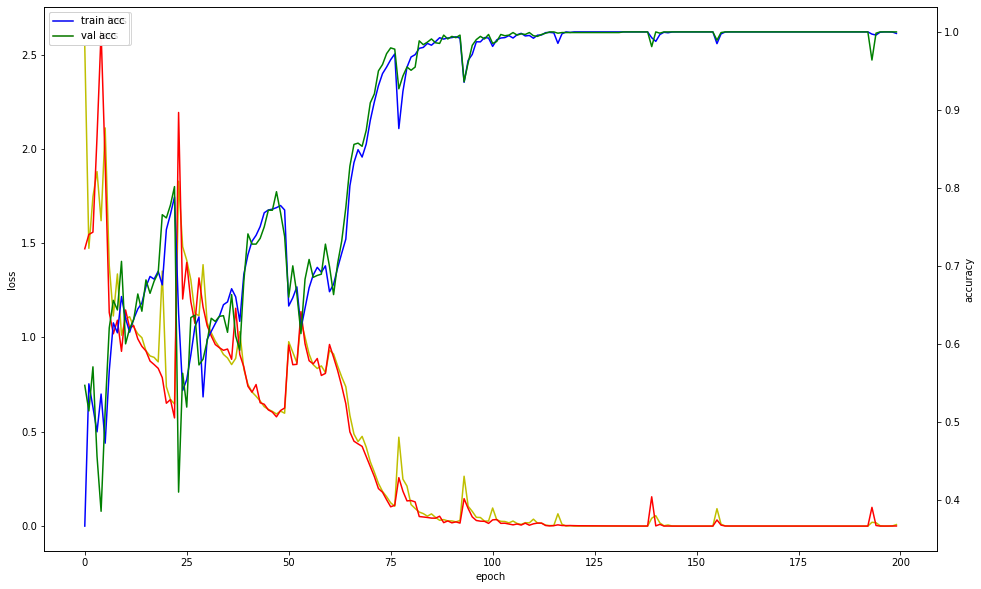

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')
plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')
y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

39/39 [==============================] - 0s 3ms/step


array([[[1189,    0],
        [   0,   31]],

       [[1174,    0],
        [   0,   46]],

       [[1181,    0],
        [   0,   39]],

       [[1185,    0],
        [   0,   35]],

       [[1172,    0],
        [   0,   48]],

       [[1177,    0],
        [   0,   43]],

       [[1175,    0],
        [   0,   45]],

       [[1184,    0],
        [   0,   36]],

       [[1175,    0],
        [   0,   45]],

       [[1178,    0],
        [   0,   42]],

       [[1183,    0],
        [   0,   37]],

       [[1175,    0],
        [   0,   45]],

       [[1178,    0],
        [   0,   42]],

       [[1177,    0],
        [   0,   43]],

       [[1188,    0],
        [   0,   32]],

       [[1181,    0],
        [   0,   39]],

       [[1189,    0],
        [   0,   31]],

       [[1176,    0],
        [   0,   44]],

       [[1173,    0],
        [   0,   47]],

       [[1178,    0],
        [   0,   42]],

       [[1168,    0],
        [   0,   52]],

       [[1177,    0],
        [   